# Lab 5: Two Dimensional Motion with Drag

_Group Members_ :

This lab is a continuation of last week's free fall and air drag lab, but with the emphasis on the physics of drag in two dimensions. 

You will be turning in a completed copy of the Jupyter notebook includes a successful simulation of an object lauched and crossing the boundary between two medium for your CAT, with all the tasks before the CAT completed and the questions answered.

Let's import some libraries and define an object called 'ball' for now.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='html5')  # this lets us call the animation object directly, without having to explicitly compile it


# preset paths, uncomment based on your OS
# Windows
#plt.rcParams['animation.ffmpeg_path'] = r'./ffmpeg_windows/bin/ffmpeg.exe'
# Mac OS/Linus
#plt.rcParams['animation.ffmpeg_path'] = r'./ffmpeg_unix/ffmpeg'


# if the above do not work, follow the instructions from lab 2:
# Change the path to ffmpeg
# Windows users can get it at https://www.gyan.dev/ffmpeg/builds/ffmpeg-git-essentials.zip
# Mac and Linux users can get it at https://ffmpeg.org/download.html
# Once you download and extract the files, write the path to the ffmpeg.exe file in the quotes below, replacing ???
# A windows path to the downloads folder, for example, will be 'C:/Users/Eric/Downloads/'
# An example of the full command is:
# plt.rcParams['animation.ffmpeg_path'] = r'D:\\ffmpeg-4.2.1-win64-static\\bin\\ffmpeg.exe'
# the r must be included and it should point to ffmpeg.exe
# On Mac/Linux it will be the downloads folder will be at '~/Downloads/'
# and Mac/Linux does not use the .exe file, instead it should point to ffmpeg as in /path/to/file/ffmpeg
# Ask your GSI if you are having trouble with the path, you can also check the if a path exists using the cell below

#uncomment with correct path
#plt.rcParams['animation.ffmpeg_path'] = r'???'


# Part One: Another Bouncing Ball

Let's first try to launch our 'ball' from the ground with the parameters above, and then let it bounce on the ground.  In lab 2, you saw a ball bounce straight up and down (in one dimension).  Now, we will be giving that same ball a horizontal velocity component as well, and looking at the motion.


We will also be running annimations, as we did in lab 2, so we will need to define some parameters to do this.  This first code block has a lot of the code definitions we will call upon later for the annimations.  You do not need to edit these, just make sure the code block is run.

**<font color=red>Code Task 5.1: Run the code below without editing.**

In [ ]:
#Defining Animation Functions
def init():
    line.set_data([], [])
    return(line)

def animate_ball_1(i):
    x = ball_1.r_array[i, 0]
    y = ball_1.r_array[i, 1]
    line.set_data(x, y)
    return (line)

def animate_ball_2(i):
    x = ball_2.r_array[i, 0]
    y = ball_2.r_array[i, 1]
    line.set_data(x, y)
    return (line)

def animate_ball_3(i):
    x = ball_3.r_array[i, 0]
    y = ball_3.r_array[i, 1]
    line.set_data(x, y)
    return (line)

class ball:
    
    def __init__(self, m=1, R=1, r=np.array([0,0,0]), v=np.array([0,0,0]), a=np.array([0,0,0])):
        
        self.m = m
        self.R = R
        self.A = np.pi*R*R
        
        self.r = r
        self.v = v
        self.a = a
        
        self.r_array = np.array([])
        self.v_array = np.array([])
        self.a_array = np.array([])

Now, lets change the initial position and velocity for a ball.  You can alter the initial launching position (pos), the angle, or the speed.  The arrays are set such that the dimensions are [x,y,z].  Since we are expanding from one dimension to two dimensions, only vary the first two array elements.

**<font color=red>Code Task 5.2: Put in the array elements for the starting velocity vectors according to the launching speed and angle.  The angle is defined from the horizontal (x).  You can also alter the starting position if you would like.**

In [ ]:
#Initialize
#Gravity
g = 9.81 #m/s^2

#Lauching Parameters
ang = np.pi/6 #Launching angle
spd = 10 #m/s  #Lauching speed

pos = np.array([0.,0.,0.])  #Three dimensional position
##Alter the velocity below
vel = np.array([0.,spd*1,0.])  #Set the velocity to be dependent upon the speed and angle defined above

print ("You are trying to launch a ball from position:", pos, "with velocity:", vel)

**<font color=blue>Problem 5.1: According to the speed and launching angle you assign, calculate analytically what the range and the maximum height are before the first bounce for your 'ball'.**

**Hint: You can use the PhET simulation: https://phet.colorado.edu/sims/html/projectile-motion/latest/projectile-motion_en.html to check your calculation.**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 5.2: From what axis is the angle of your velocity defined?  In what direction does the ball launch with an angle of $0$?  In what direction does the ball launch with an angle of $\pi/2$?**

_Double click this cell to begin editing. Write your answer here._

Now, let's use the same code from lab 2 to determine the motion of this ball.  

**<font color=red>Code Task 5.3: Run the two code blocks below without editing to model the motion of the bouncing ball in two dimensions.**

In [ ]:
def force(m):
    '''
    This force is dependent only on the y-coordinate, and represents gravity!
    F_y = -mg
    '''
    output_force = -m * np.array([0., g, 0.])

    return output_force

In [ ]:
ball_1 = ball(m=1, r=pos, v=vel)

T = 3 #Total time for the motion
dt = 0.02 #Time increments
times = np.arange(0, T+dt, dt)

N = times.size

ball_1.a_array = np.empty((N,3))
ball_1.a_array[0] = ball_1.a
ball_1.v_array = np.empty((N,3))
ball_1.v_array[0] = ball_1.v
ball_1.r_array = np.empty((N,3))
ball_1.r_array[0] = ball_1.r

i = 1
for t in times[1:]:
    
    # first update the accelerations
    ball_1.a = force(ball_1.m)/ball_1.m
    # then append the new value to the list
    ball_1.a_array[i] = ball_1.a
    
    # if the ball is "in the floor", neglect gravity briefly in the calculation of v
    # this keeps the ball from "sinking" into the ground over time
    if ball_1.r[1] <= 0: ball_1.a = 0
    
    # second update the velocities
    ball_1.v = ball_1.v + ball_1.a * dt
    # then append the new value to the list
    ball_1.v_array[i] = ball_1.v  
    
    # third update the positions
    ball_1.r = ball_1.r + ball_1.v * dt
    # then append the new value to the list
    ball_1.r_array[i] = ball_1.r
    
    # if the ball is below y = 0 and traveling downwards, reverse direction of velocity
    if ball_1.r[1] <= 0 and ball_1.v[1] <= 0: ball_1.v[1] = -0.5 * ball_1.v[1]
    
    # update iteration count
    i = i + 1

**<font color=red>Code Task 5.4: Generate plots according to the axes given in each subplot.**

In [ ]:
fig1, axs1 = plt.subplots(4,2)

axs1[0,0].plot(times[1:], ball_1.a_array[1:,0], '.')
axs1[0,0].set_xlabel('$t$')
axs1[0,0].set_ylabel('$a_x$')

axs1[1,0].plot(times[1:], ball_1.v_array[1:,0], '.')
axs1[1,0].set_xlabel('$t$')
axs1[1,0].set_ylabel('$v_x$')

axs1[2,0].plot(times[1:], ball_1.r_array[1:,0], '.')
axs1[2,0].set_xlabel('$t$')
axs1[2,0].set_ylabel('$r_x$')

axs1[0,1].plot(times[1:], ball_1.a_array[1:,1], '.')
axs1[0,1].set_xlabel('$t$')
axs1[0,1].set_ylabel('$a_y$')

axs1[1,1].plot(times[1:], ball_1.v_array[1:,1], '.')
axs1[1,1].set_xlabel('$t$')
axs1[1,1].set_ylabel('$v_y$')

axs1[2,1].plot(times[1:], ball_1.r_array[1:,1], '.')
axs1[2,1].set_xlabel('$t$')
axs1[2,1].set_ylabel('$r_y$')

axtraj1 = plt.subplot2grid((4, 2), (3, 0), colspan=2)
axtraj1.plot(ball_1.r_array[1:,0],ball_1.r_array[1:,1])
axtraj1.set_xlabel('$r_x$')
axtraj1.set_ylabel('$r_y$')

fig1.set_size_inches(12,12)
fig1.tight_layout()

**<font color=red>Code Task 5.5: Run the code below to animate the ball bouncing, as you numerically calculated for above.**

In [ ]:
#Animate ball_1
fig2, axs2 = plt.subplots()

if np.min(ball_1.r_array[:,0])==np.max(ball_1.r_array[:,0]):
    axs2.set_xlim((np.min(ball_1.r_array[:,0])-0.05), (np.max(ball_1.r_array[:,0]) + 0.05)
             )
else:
    axs2.set_xlim((np.min(ball_1.r_array[:,0]) - 0.1*np.abs(np.min(ball_1.r_array[:,0])),
               np.max(ball_1.r_array[:,0]) + 0.1*np.abs(np.max(ball_1.r_array[:,0])))
             )       
                  
axs2.set_ylim((np.min(ball_1.r_array[:,1]) - 0.1*np.abs(np.min(ball_1.r_array[:,1])),
               np.max(ball_1.r_array[:,1]) + 0.1*np.abs(np.max(ball_1.r_array[:,1])))
             )
axs2.plot([np.min(ball_1.r_array[:,0]),np.max(ball_1.r_array[:,0])], [0,0], color='C1', lw=3)
line, = axs2.plot([], [], '.', markersize=24)
plt.close()

anim_1 = animation.FuncAnimation(fig2, animate_ball_1, init_func=init, frames=N, interval=20)

anim_1

As in lab 2, you can pause the simulation video after you are done watching it.  

**<font color=blue>Problem 5.3: What are the range and maximum height you obtain from the simulation? (can use code to find out,  look at before the first bounce to determine this.)**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 5.4: Compare your results from Question 1 and Question 2.  Justify how well they do or do not match.**

_Double click this cell to begin editing. Write your answer here._

# Part Two: Adding in Drag

The drag force is usually written in the form $\vec{F}_{drag} = - \frac{1}{2} \rho A C \|\vec{v}\|^2 \hat{v}$, or equivalently $\vec{F}_{drag} = - \frac{1}{2} \rho A C \|\vec{v}\| \vec{v}$.  You investigated this in Lab 4 with a ping pong ball, and looked at the motion in one dimension over time due to the air drag force. 

The drag force is always oriented directly opposite to the object's direction of motion ($\vec{F}\| -\hat{v}$), hence the "-" sign in the front. 

**<font color=blue>Problem 5.5: If the sign on the drag force were positive, what would that imply about this system?  Since it is always negative, what does this mean about the drag force's relationship to the motion?**

_Double click this cell to begin editing. Write your answer here._

The symbol rho, $\rho$, is the density of the medium. The higher the density, the more mass per unit volume.  This also equates to being harderfor anything to fly through.  Imagine swimming through honey (higher density) versus swimming through water (lower density).

The coefficient A is the cross section area of the flying object, which is what the 3 dimensional object would look like projected into a 2D plane.  Imagine the shadow created by a ball.  This is the cross sectional area.  This is involved in drag force, because a larger cross sectional area, the more fluid can push against the object to cause a larger drag force. Skydivers in free fall have a relatively small cross sectional area of just their body.  When they release their parachute, they significantly increase their cross sectional area with the fabric of their parachute, which increases their drag force.


The coefficient C is a drag cofficient determined by the shape of the moving object. Although it is complext to derive this coefficient from models, we can assume that the cofficients are already given to us in this chart: (Also feel free to google the geometric factor for anything you want).  This coefficient is why engineers and designers of cars and jets create the shape in streamline shapes.

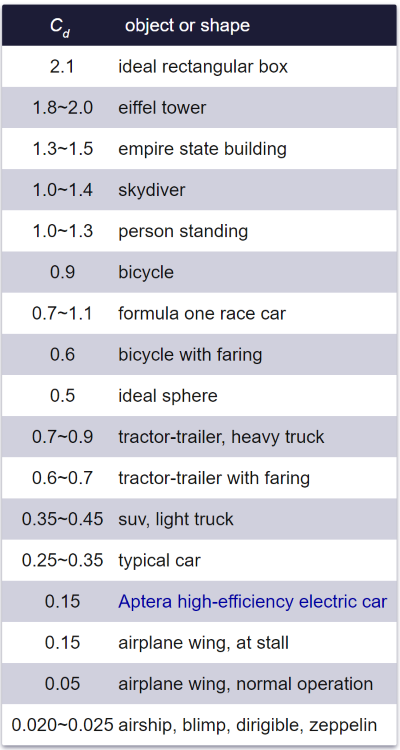

We are assuming the dependence of air drag force magnitude on speed is quadratic here ($\|\vec{F}\| \propto \|v\|^2$), because it is generally appropriate for objects moving at medium speeds through dilute fluids (ex: something moving through air), but the relation can change depend on the exact motion.  For example ($\|\vec{F}\| \propto \|v\|^n$) where $n$ is an empirically determined number that's greater than 0.  We will not be investigating anything other than $n=2$ today however.

**<font color=red>Code Task 5.6: Put in the density of water and some characteristics of the 'ball' you choose in the initialization box below with the same launching parameters.  This could be the angle, speed, or position of the launch, or geometry of your 'ball'.**

In [ ]:
#Initialize again
#Gravity
g = 9.81 #m/s^2

#Lauching Parameters
ang = np.pi/6 #Launching angle in radian
spd = 5 #m/s  #Lauching speed

pos = np.array([0.,0.,0.]) #Three dimensional position
vel = np.array([spd*np.cos(ang),spd*np.sin(ang),0.]) #Three dimensional velocity

#Environment
rho = ??? #kg/m^3 


#'Ball'
Geom = "Bullet"
mass =  1 #kg #mass of the 'ball'
C = 0.5   #Drag coefficient determined by shape subject to change by students
rad = 1  #m  #Radius of our 'ball' #change accordingly by students

print("You are launching a", Geom, "with speed", spd, "m/s at an angle of", ang*180/np.pi, "degrees in a medium of density", rho, 'kg/m^3')

**<font color=red>Code Task 5.7: Run the code below without editing.  Your total force (gravity and drag force) has been given for you.**

In [ ]:
#def force(m):
#    '''
#    This force is dependent only on the y-coordinate, and represents gravity!
#    F_y = -mg
#    '''
#    output_force = -m * np.array([0., g, 0.])
#
#    return output_force

def force_d(m, v, A):
    '''
    The gravitational force depends only on y-coordinate, but not the drag force!
    F_y = -mg
    F_drag = -1/2 rho A C |v| v
    '''
    output_force = -m*np.array([0, g, 0])-1/2*rho*A*C*np.linalg.norm(v)*v #Adding in drag

    return output_force

**<font color=red>Code Task 5.8: First, run the code below without editing to determine the motion of the ball 2.**

In [ ]:
ball_2 = ball(m=mass, R=rad, r=pos, v=vel)

T = 0.045
dt = 0.001

times = np.arange(0, T+dt, dt)

N = times.size

ball_2.a_array = np.empty((N,3))
ball_2.a_array[0] = ball_2.a
ball_2.v_array = np.empty((N,3))
ball_2.v_array[0] = ball_2.v
ball_2.r_array = np.empty((N,3))
ball_2.r_array[0] = ball_2.r

i = 1
for t in times[1:]:
    
    # first update the accelerations
    ball_2.a = force_d(ball_2.m, ball_2.v, ball_2.A)/ball_2.m
    # then append the new value to the list
    ball_2.a_array[i] = ball_2.a

    # if the ball is "in the floor", neglect gravity briefly in the calculation of v
    # this keeps the ball from "sinking" into the ground over time
    if ball_2.r[1] <= 0: ball_2.a = 0
    
    # second update the velocities
    ball_2.v = ball_2.v + ball_2.a * dt
    # then append the new value to the list
    ball_2.v_array[i] = ball_2.v  
    
    # third update the positions
    ball_2.r = ball_2.r + ball_2.v * dt
    # then append the new value to the list
    ball_2.r_array[i] = ball_2.r
    
    # if the ball is below y = 0 and traveling downwards, reverse direction of velocity
    if ball_2.r[1] <= 0 and ball_2.v[1] <= 0: ball_2.v[1] = -0.5 * ball_2.v[1]

    
    # update iteration count
    i = i + 1
    
    

**<font color=red>Code Task 5.9: Run the code below to generate plots of the motion according to the axes given for the dragged motion.**

In [ ]:
fig1, axs1 = plt.subplots(4,2)

axs1[0,0].plot(times[1:], ball_2.a_array[1:,0], '.')
axs1[0,0].set_xlabel('$t$')
axs1[0,0].set_ylabel('$a_x$')

axs1[1,0].plot(times[1:], ball_2.v_array[1:,0], '.')
axs1[1,0].set_xlabel('$t$')
axs1[1,0].set_ylabel('$v_x$')

axs1[2,0].plot(times[1:], ball_2.r_array[1:,0], '.')
axs1[2,0].set_xlabel('$t$')
axs1[2,0].set_ylabel('$r_x$')

axs1[0,1].plot(times[1:], ball_2.a_array[1:,1], '.')
axs1[0,1].set_xlabel('$t$')
axs1[0,1].set_ylabel('$a_y$')

axs1[1,1].plot(times[1:], ball_2.v_array[1:,1], '.')
axs1[1,1].set_xlabel('$t$')
axs1[1,1].set_ylabel('$v_y$')

axs1[2,1].plot(times[1:], ball_2.r_array[1:,1], '.')
axs1[2,1].set_xlabel('$t$')
axs1[2,1].set_ylabel('$r_y$')

axtraj1 = plt.subplot2grid((4, 2), (3, 0), colspan=2)
axtraj1.plot(ball_2.r_array[1:,0],ball_2.r_array[1:,1])
axtraj1.set_xlabel('$r_x$')
axtraj1.set_ylabel('$r_y$')

fig1.set_size_inches(12,12)
fig1.tight_layout()

**<font color=blue>Problem 5.6: Do any of these graphs make sense/ accurately describe the motion of the ball through water?  Why or why not?  Describe what these graphs look like, specifically whether the $r_y$ vs. $r_x$ graph represents the motion of a projectile with air drag accounted for.**

_Double click this cell to begin editing. Write your answer here._

In lab two, we had briefly discussed the importance of selecting an appropriate $dt$, or time step, for the Euler's Method calculation.  If $dt$ is too large, the important features may be skipped over.  However, if $dt$ is too small, there will be a lot more data points.  For graphs like above, that isn't too much of an issue, but for creating animations (like you will below), you will notice that the code takes noticeably longer to run.  Every decimal point you move the $dt$ value (example from 0.001 to 0.0001), the computation has 10 times the number of data points in the calculation.  Go back to code task 8 and adjust the $dt$ values, and check the $r_y$ vs. $r_x$ plot you create in code task 9 to verify the motion is that of a projectile with air drag.  Then run code task 10, which will animate what the data from code task 9.  You can answer question 7 while you are waiting on the code from Code Task 10.

**<font color=blue>Problem 5.7: Go back to Code Task 8 and adjust your time incriment $dt$. Does this now produce a reasonable dragged projectile in water? Record the value of dt and explain why this allows you to escape from the numerical dilemma you encountered for Question 6.**

_Double click this cell to begin editing. Write your answer here._

**<font color=red>Code Task 5.10: Run the code below to animate the bullet (ball 2), as you numerically calculated for above.**

In [ ]:
#Animate ball_2
fig3, axs3 = plt.subplots()
axs3.set_xlim((np.min(ball_2.r_array[:,0]) - 0.1*np.abs(np.min(ball_2.r_array[:,0])),
               np.max(ball_2.r_array[:,0]) + 0.1*np.abs(np.max(ball_2.r_array[:,0])))
             )
axs3.set_ylim((np.min(ball_2.r_array[:,1]) - 0.1*np.abs(np.min(ball_2.r_array[:,1])),
               np.max(ball_2.r_array[:,1]) + 0.1*np.abs(np.max(ball_2.r_array[:,1])))
             )
axs3.plot([np.min(ball_2.r_array[:,0]),np.max(ball_2.r_array[:,0])], [0,0], color='C1', lw=3)
line, = axs3.plot([], [], '.', markersize=24)
plt.close()

anim_2 = animation.FuncAnimation(fig3, animate_ball_2, init_func=init, frames=N, interval=5)

anim_2

**<font color=blue>Problem 5.8: Record the range and maximum height you obtain, compare it with the previous results without drag force (Part One).**

_Double click this cell to begin editing. Write your answer here._

The code that you used above can be edited in code task 6 for any initial conditions you would like to change. You can change some variables at this point, and run the code that follows to determine the effect of those initial conditions.  

**<font color=blue>Problem 5.9: Change the environment to another medium of your choice, (air, honey, molasses, etc.) obtain the range and the maximum height again and compare with the results from launching in water.**

_Double click this cell to begin editing. Write your answer here._

# Cumulative Assessment Task (CAT)

In this section, you will combine the skills you used above and in previous labs.  You can chose the specifics of the 'story' you would like, with the requirements that you must include 1) two dimensional motion, 2) air drag, and 3) you must cross a boundary between densities.  

An example that covers these requirements is: You launch a bullet at a given angle over a lake.  After travelling through the air, the bullet then enters the lake and continues travelling through the water.  

**<font color=blue>Problem 5.10: Determine a story that you will model, using the specifications given above.  Write this out below.**

### Story: 
_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 5.11: Write below how you plan to model your story.**

_Double click this cell to begin editing. Write your answer here._

The code from part one and part two of the lab has been copied below for you.  Update as you need to model your specific story.

**<font color=red>Coding Task 5.11: Change/add any necessary variables and functions you need, adding any target of your choice, (basically do anything you want with the code), simulate the physical phenomenon in your story.**

In [ ]:
#Initialize again
#Gravity
g = 9.81 #m/s^2

#Lauching Parameters
ang = ??? #Launching angle in radian
spd = ??? #m/s  #Lauching speed

pos = np.array([???,???,0.]) #Three dimensional position
vel = np.array([???,???,0.]) #Three dimensional velocity

#Environment
rho1 = ??? #kg/m^3   
rho2 = ??? #kg/m^3  

#'Ball'
Geom = "???"
mass = ???  #kg #mass of the bullet
C = ???  #Drag coefficient determined by shape 
rad = ???  #m  #Radius of our 'ball' 

print("You are launching a", Geom, "with speed", spd, "m/s at an angle of", ang*180/np.pi, "degrees in a medium of density", rho1, 'kg/m^3', 'into another medium of density', rho2, 'kg/m^3')

**<font color=red>Coding Task 5.12: Change/add as necessary to simulate the physical phenomenon in your story.**

In [ ]:
#def force(m):
#    '''
#    This force is dependent only on the y-coordinate, and represents gravity!
#    F_y = -mg
#    '''
#    output_force = -m * np.array([0., g, 0.])
#
#    return output_force

def force_d2(m, v, r, A):
    '''
    The gravitational force depends only on y-coordinate, but not the drag force!
    F_y = -mg
    F_drag = -1/2 rho A C |v| v
    '''
    output_force = -m*np.array([0, g, 0])-1/2*rho*A*C*np.linalg.norm(v)*v

    
    return output_force

**<font color=red>Coding Task 5.13: First, run the code below without editing to determine the motion of the ball 3.**

In [ ]:
ball_3 = ball(m=mass, R=rad, r=pos, v=vel)

T = 6
dt = 0.01
times = np.arange(0, T+dt, dt)

N = times.size

ball_3.a_array = np.empty((N,3))
ball_3.a_array[0] = ball_3.a
ball_3.v_array = np.empty((N,3))
ball_3.v_array[0] = ball_3.v
ball_3.r_array = np.empty((N,3))
ball_3.r_array[0] = ball_3.r

i = 1
for t in times[1:]:
    
    # first update the accelerations
    ball_3.a = force_d2(ball_3.m, ball_3.v, ball_3.r, ball_3.A)/ball_3.m
    # then append the new value to the list
    ball_3.a_array[i] = ball_3.a
    
    # second update the velocities
    ball_3.v = ball_3.v + ball_3.a * dt
    # then append the new value to the list
    ball_3.v_array[i] = ball_3.v  
    
    # third update the positions
    ball_3.r = ball_3.r + ball_3.v * dt
    # then append the new value to the list
    ball_3.r_array[i] = ball_3.r
        
    # update iteration count
    i = i + 1

**<font color=red>Coding Task 5.14:  Run the code below to generate plots of the motion according to the axes given for the physical phenomenon in your story.**

In [ ]:
fig1, axs1 = plt.subplots(4,2)

axs1[0,0].plot(times[1:], ball_3.a_array[1:,0], '.')
axs1[0,0].set_xlabel('$t$')
axs1[0,0].set_ylabel('$a_x$')

axs1[1,0].plot(times[1:], ball_3.v_array[1:,0], '.')
axs1[1,0].set_xlabel('$t$')
axs1[1,0].set_ylabel('$v_x$')

axs1[2,0].plot(times[1:], ball_3.r_array[1:,0], '.')
axs1[2,0].set_xlabel('$t$')
axs1[2,0].set_ylabel('$r_x$')

axs1[0,1].plot(times[1:], ball_3.a_array[1:,1], '.')
axs1[0,1].set_xlabel('$t$')
axs1[0,1].set_ylabel('$a_y$')

axs1[1,1].plot(times[1:], ball_3.v_array[1:,1], '.')
axs1[1,1].set_xlabel('$t$')
axs1[1,1].set_ylabel('$v_y$')

axs1[2,1].plot(times[1:], ball_3.r_array[1:,1], '.')
axs1[2,1].set_xlabel('$t$')
axs1[2,1].set_ylabel('$r_y$')

axtraj1 = plt.subplot2grid((4, 2), (3, 0), colspan=2)
axtraj1.plot(ball_3.r_array[1:,0],ball_3.r_array[1:,1])
axtraj1.set_xlabel('$r_x$')
axtraj1.set_ylabel('$r_y$')

fig1.set_size_inches(12,12)
fig1.tight_layout()

**<font color=blue>Problem 5.12: At what point in time does your object cross the density boundary?  How does this appear in the acceleration, velocity, and position graphs?**

_Double click this cell to begin editing. Write your answer here._

**<font color=red>Code Task 5.15: Run the code below to animate the bullet (ball 3), as you numerically calculated for above.**

In [ ]:
#Animation for ball_3   
fig4, axs4 = plt.subplots()
axs4.set_xlim((np.min(ball_3.r_array[:,0]) - 0.1*np.abs(np.min(ball_3.r_array[:,0])),
               np.max(ball_3.r_array[:,0]) + 0.1*np.abs(np.max(ball_3.r_array[:,0])))
             )
axs4.set_ylim((np.min(ball_3.r_array[:,1]) - 0.1*np.abs(np.min(ball_3.r_array[:,1])),
               np.max(ball_3.r_array[:,1]) + 0.1*np.abs(np.max(ball_3.r_array[:,1])))
             )
axs4.plot([np.min(ball_3.r_array[:,0]),np.max(ball_3.r_array[:,0])], [0,0], color='C1', lw=3)
line, = axs4.plot([], [], '.', markersize=24)
plt.close()

anim_3 = animation.FuncAnimation(fig4, animate_ball_3, init_func=init, frames=N, interval=10)

anim_3

**<font color=blue>Problem 5.13: Discuss the animation above.**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 5.14: When your object crossed the density boundary, what was the velocity it was travelling (total magnitude, and for each component)?**

_Double click this cell to begin editing. Write your answer here._

In lab 4, you calculated the terminal velocity of an object as it was falling in one dimension.  Now, you will calculate the terminal velocity on both sides of your density boundary.

**<font color=red>Code Task 5.16: Run the code below calculate the terminal velocity for your two densities.**

In [ ]:
v1 = np.sqrt(2*ball_3.m*g/(rho1*ball_3.A*C))
v2 = np.sqrt(2*ball_3.m*g/(rho2*ball_3.A*C))
print('Terminal velocity of medium 1:', v1, 'm/s, and termial velocity of medium 2:', v2, 'm/s')

**<font color=blue>Problem 5.15: Compare the values you calculated in code task 16 to the velocity you determined for question 14.**

_Double click this cell to begin editing. Write your answer here._

If your velocity in question 14 was less than the terminal velocity of your new density, go back and adjust your initial conditions so that you cross the density boundary at a velocity higher than the new terminal velocity of your medium (and indicate that you did so in your answer to question 14).  This will help you answer the next question.

**<font color=blue>Problem 5.16: What happens when your object travels faster than the terminal velocity in your medium?**

_Double click this cell to begin editing. Write your answer here._

### <center>You're done! Submit your lab per the following instructions.<font color=white><#!S!#>

* Save this file with the lab number and group number to submit to canvas, e.g. `group01_lab02.ipynb`. 
* You only need to submit one file as a group to the canvas assignment and it will count for all group members.
* The group recorder should still send the worksheet to their group members so they have a copy.
* Save the file as a html file. You can do this by opening the `File` tab on the top left corner of Jupyter, then select `Download as > html (.html)`
* Submit both the .ipynb and .html files to canvas under the `Lab 5: Two Dimensional Motion with Drag` assignment.